In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

print('Data source import complete.')


Data source import complete.


# Langue des signes : réseaux de neurones

## Initialisations

In [2]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [3]:
from keras.datasets import mnist

from keras.models import Sequential, load_model

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.utils import to_categorical

In [4]:
import kagglehub

path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sign-language-mnist


## Le dataset du langage des signes

On utilise le dataset du langage des signes :  
https://www.kaggle.com/datamunge/sign-language-mnist#american_sign_language.PNG

<img src="https://storage.googleapis.com/kagglesdsdata/datasets/3258/5337/amer_sign2.png?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1582898150&Signature=FSNN2mBuff7zGjEYUvGBn%2FrLFoYAGfkl5ivl6PT127E7NEAAnfxyWKOLtSpRN3ZN4NbBoXhzo%2Bee%2F5rC%2F7rnI1SyTljAIzjqcE9%2BMINHU3IFBJqJErsH5ilIln2d73QG%2BMXz8F3jGezxjISP%2BGa3SD7WC13og1hpRHMjS0bo4teSkZCRNycHUaCQV16ZRGmhpgftAuhBxPUFZBqTt46nMpnG5pYpl6NYRAD4ss3%2B7BvmPS%2FUMzFwDCeZsNLq0VNcqpl05isQZ2qT1KhFdg1j0K0zp%2BO%2BIALp42iselnVsx%2B1cc97YsELZd1t6mIp6TrTUQ06HndlxSw9J1FilaQKdg%3D%3D">

In [5]:
df=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')

In [6]:
df.shape

(27455, 785)

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Le dataset est bien équilibré (mais il manque les lettres Y et Z) :

In [8]:
df.label.value_counts()

,count
label,
17,1294
16,1279
11,1241
22,1225
5,1204
18,1199
14,1196
3,1196
19,1186


In [9]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


On convertit les lignes de pixels en matrices (images) :

In [10]:
n_samples = len(df.index)
images = np.array(df.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28)

On affiche les 50 premiers :

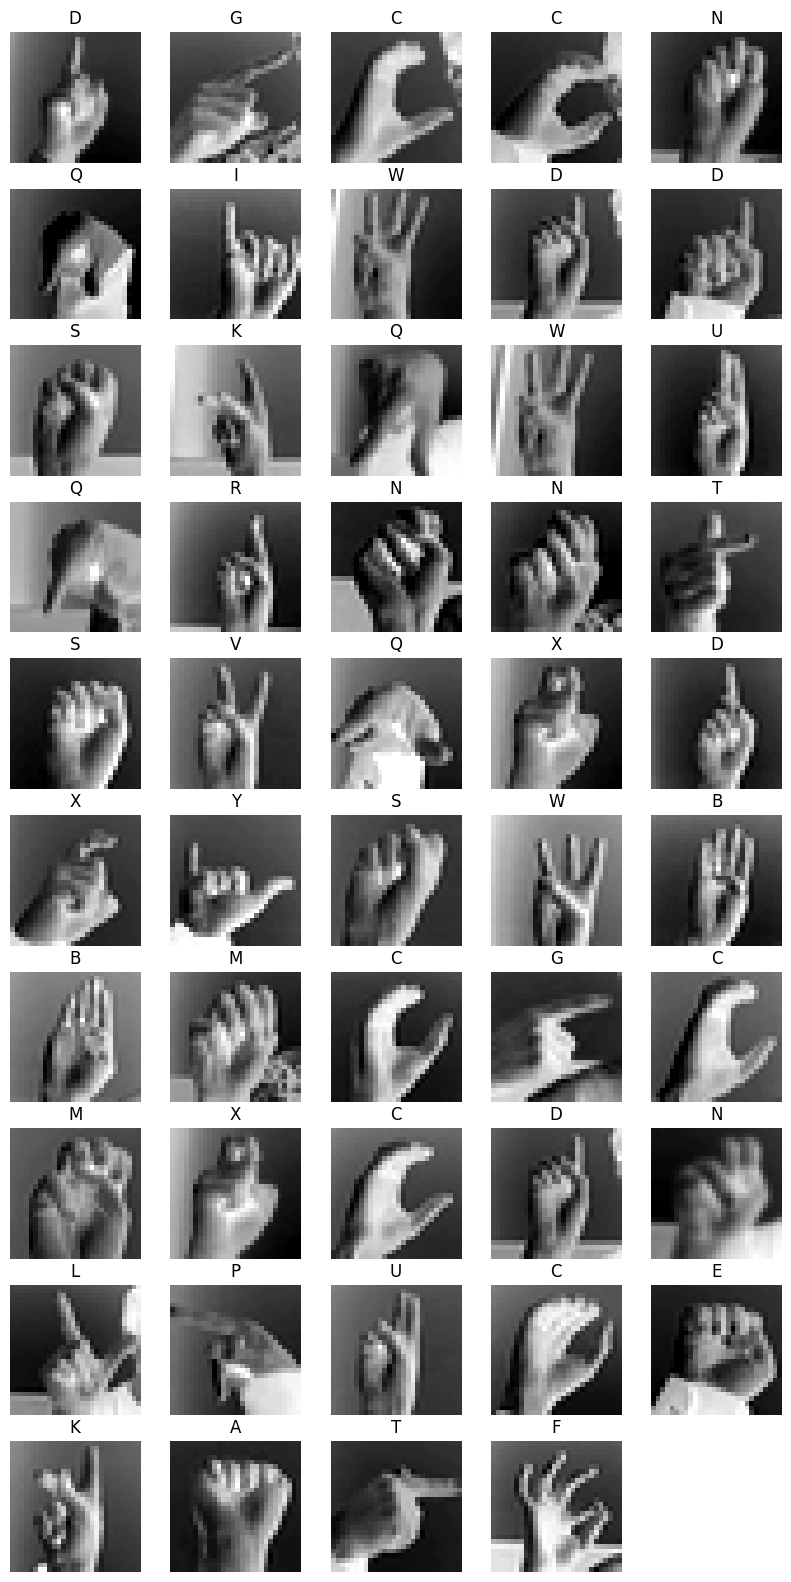

In [11]:
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[df.label[i]])

## Réseaux denses (sklearn)

On sépare la cible et les caractéristiques :

In [12]:
y = df['label']
X = df.drop(['label'] , axis=1)

On normalise les valeurs entre 0 et 1 :

In [13]:
X = X/255

Séparation train / test :

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

On utilise la méthode *MLPClassifier* de *sklearn* pour utiliser un réseau de neurones à deux couches cachées de 200 et 60 neurones :

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200,60))
mlp.fit(X_train,y_train)
y_mlp = mlp.predict(X_test)

La pertinence est très bonne :

In [16]:
mlp_score = accuracy_score(y_test, y_mlp)
print(mlp_score)

1.0


et la matrice de confusion :

In [17]:
pd.crosstab(y_test, y_mlp, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,2,3,4,5,6,7,8,10,...,16,17,18,19,20,21,22,23,24,All
Reel,,,,,,,,,,,,,,,,,,,,,
0,223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,223
1,0,176,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,176
2,0,0,250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250
3,0,0,0,229,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,229
4,0,0,0,0,178,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,178
5,0,0,0,0,0,249,0,0,0,0,...,0,0,0,0,0,0,0,0,0,249
6,0,0,0,0,0,0,205,0,0,0,...,0,0,0,0,0,0,0,0,0,205
7,0,0,0,0,0,0,0,195,0,0,...,0,0,0,0,0,0,0,0,0,195
8,0,0,0,0,0,0,0,0,216,0,...,0,0,0,0,0,0,0,0,0,216


## Réseaux denses (Keras/Tensorflow)

La définition du même réseau de neurones est un peu plus compliquée avec *Keras*, mais il est utile de comprendre cette première étape avant d'utiliser les réseaux convolutifs

Comme l'activation d'un neurone donne une valeur (probabilité) entre 0 ou 1, on code la cible (classes entre 0 et 24) sous la forme d'un vecteur de 0 ou 1 (*one hot encoding*) avec *to_categorical* :

In [18]:
from keras.utils import to_categorical

In [19]:
print(y[0])
y_cat = to_categorical(y)
print(y_cat[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


On a seulement 25 classes (il manque les Y et Z dans le dataset) :

In [20]:
num_classes = y_cat.shape[1]
print(num_classes)

25


On sépare train et test :

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=1)

Pour Keras, il est nécessaire d'avoir des tableaux et non des dataframes :

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

On va utiliser une architecture en *couches* (modèle *Sequential*), avec des couches *denses* :

In [43]:
from keras.models import Sequential
from keras.layers import Dense

On définit un modèle à deux couches cachées de 200 et 60 neurones  
La dernière couche comporte 25 neurones (le nombre de classes) pour la classification :

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

model = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(60, activation='relu'),
    Dense(num_classes, activation='softmax')
])

L'activation de la dernière couche est un *softmax* : la somme des valeurs de l'activation des neurones de la dernière couche est 1  
(on interprète la sortie des derniers neurones comme une probabilité d'appartenance à la classe correspondante)

On "compile" le modèle, avec une *categorical_crossentropy* comme mesure de distance (distance probabiliste multi classes)

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
train = model.fit(X_train , y_train , validation_data=(X_test,y_test), epochs=30, verbose=1)

Epoch 1/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1832 - loss: 2.7542 - val_accuracy: 0.4750 - val_loss: 1.5857
Epoch 2/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5411 - loss: 1.4468 - val_accuracy: 0.6480 - val_loss: 1.1090
Epoch 3/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6531 - loss: 1.0750 - val_accuracy: 0.7139 - val_loss: 0.8768
Epoch 4/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7309 - loss: 0.8351 - val_accuracy: 0.7827 - val_loss: 0.6524
Epoch 5/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7965 - loss: 0.6351 - val_accuracy: 0.8405 - val_loss: 0.5119
Epoch 6/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8381 - loss: 0.5080 - val_accuracy: 0.8479 - val_loss: 0.4782
Epoch 7/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8761 - loss: 0.3999 - val_accuracy: 0.9066 - val_loss: 0.3151
Epoch 8/30
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8938 - loss: 0.3346 - val_accuracy: 0.

Pertinence :

In [47]:
model.evaluate(X_test,y_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0506


[0.04672476276755333, 0.9841558933258057]

La variable *train* mémorise l'historique des scores sur l'ensemble d'apprentissage :

In [48]:
print(train.history['accuracy'])

[0.3043616712093353, 0.5754871368408203, 0.6731925010681152, 0.7488162517547607, 0.809005618095398, 0.8485248684883118, 0.8818521499633789, 0.9026133418083191, 0.930431604385376, 0.9489619135856628, 0.9597523212432861, 0.9680841565132141, 0.9699053168296814, 0.9779183864593506, 0.9787834882736206, 0.9939901828765869, 0.9733200073242188, 0.9908486604690552, 0.983245313167572, 0.9786468744277954, 0.9981788396835327, 0.9798306226730347, 0.9911218285560608, 0.9952194690704346, 0.9997723698616028, 0.9706792831420898, 0.9999544620513916, 0.9986340999603271, 0.9692679047584534, 0.9989073276519775]


et sur l'ensemble de validation :

In [49]:
print(train.history['val_accuracy'])

[0.47495901584625244, 0.6479694247245789, 0.7138954401016235, 0.7827354073524475, 0.8404662013053894, 0.8479329943656921, 0.9065743684768677, 0.9125842452049255, 0.9490074515342712, 0.9426333904266357, 0.9752321839332581, 0.9417228102684021, 0.9750500917434692, 0.991986870765686, 0.9969040155410767, 0.9967219233512878, 0.9533782601356506, 0.9994536638259888, 0.9998179078102112, 0.9996357560157776, 0.9903478622436523, 0.9998179078102112, 0.9861591458320618, 0.9996357560157776, 0.9914405345916748, 1.0, 1.0, 0.9065743684768677, 1.0, 0.9841558933258057]


On définit une fonction pour afficher un graphique des scores :

In [50]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

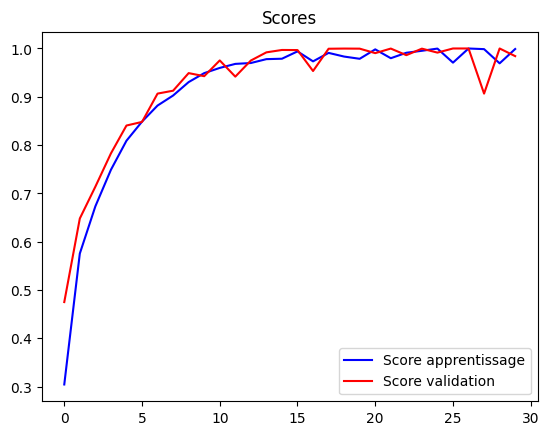

In [51]:
plot_scores(train)

In [54]:
model.save("sign_language_model.h5")